In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import jinja2 as jj


p1 = (0., 0., 0.)
p2 = (500e-9, 125e-9, 3e-9)
n = (128, 32, 1)

mesh = df.Mesh(p1=p1, p2=p2, n=n)
mesh

Mesh(Region(p1=(0.0, 0.0, 0.0), p2=(5e-07, 1.25e-07, 3e-09)), n=(128, 32, 1), attributes: (unit: m, fourierspace: False, isplane: False))

In [2]:
# Material Parameters
M  = 800e3
A   = 13e-12
alpha = 0.02

system = mm.System()
system.energy = mm.Exchange(A=A) + mm.Demag()
system.energy

Exchange(A=1.3e-11) + Demag()

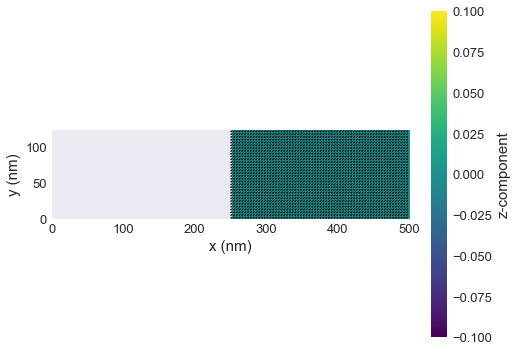

In [8]:
def Msat(point):
    x, y, z = point
    return 800e3 if x >= 250e-9 else 0

system.m = df.Field(value=[1, 1, 0], dim=3, norm=Msat, mesh=mesh)
system.m.plane('z').mpl()

In [10]:
system.m.write('minit.ovf')

In [4]:
jinja_env = jj.Environment(loader=jj.loaders.FileSystemLoader("Templates"))
mu_config = jinja_env.get_template('base.jinja2')
print(mu_config.render(mesh=mesh, system=system))

SetGridsize(128, 32, 1)
SetCellsize(3.90625e-09, 3.90625e-09, 3e-09)

Aex = 1.3e-11
NoDemagSpins = 0
